In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import scipy.stats as sp
import statsmodels.api as sm
from pandas.stats.api import ols
import datetime
#from datetime import datetime
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.rc('svg', fonttype = 'svgfont')
#plt.rc('font', family='Arial', size=12)

In [3]:
import wellapplication as wa

In [4]:
import sys
import platform
import matplotlib
print("Operating System " + platform.system() + " " + platform.release())
print("Python Version " + str(sys.version))
print("Pandas Version " + str(pd.__version__))
print("Numpy Version " + str(np.__version__))
print("Matplotlib Version " + str(matplotlib.__version__))
print(sys.executable)

Operating System Windows 7
Python Version 2.7.8 (default, Jun 30 2014, 16:03:49) [MSC v.1500 32 bit (Intel)]
Pandas Version 0.17.1
Numpy Version 1.10.4
Matplotlib Version 1.5.1
c:\python27\arcgis10.3\python.exe


In [5]:
wa.__version__

'0.2.4'

In [6]:
rootlocal = 'E:/PROJECTS/POWMOW/'
#rootlocal = '/media/p/Transcend/PROJECTS/POWMOW/'
OUT = rootlocal + 'all.csv'

In [7]:
df = pd.read_csv(OUT,index_col=0)

In [8]:
stations = [u'UL_JF_Q_gpm', u'UL_LW_Q_gpm', u'LL_LW_Q_gpm', u'LL_JF_Q_gpm', u'HL_LW_Q_gpm', u'HL_JF_Q_gpm', 
            u'NB_US_Q_gpm', u'NB_LW_Q_gpm', u'HLW_wl_elev_ft', u'EXW_wl_elev_ft']

In [9]:
labels = ['Upper Lefty\'s Cascade', 'Upper Lefty\'s Loughlin', 'Lower Lefty\'s Loughlin',
            'Lower Lefty\'s Cascade', 'Hidden Lake Loughlin', 'Hidden Lake Cascade', 
            'North Boundary UGS', 'North Boundary Loughlin', 'Hidden Lake Well', 'Exploration Well 2']

In [10]:
print(df.index[0])
print(df.index[-1])

2012-10-01 00:00:00
2015-10-04 10:45:00


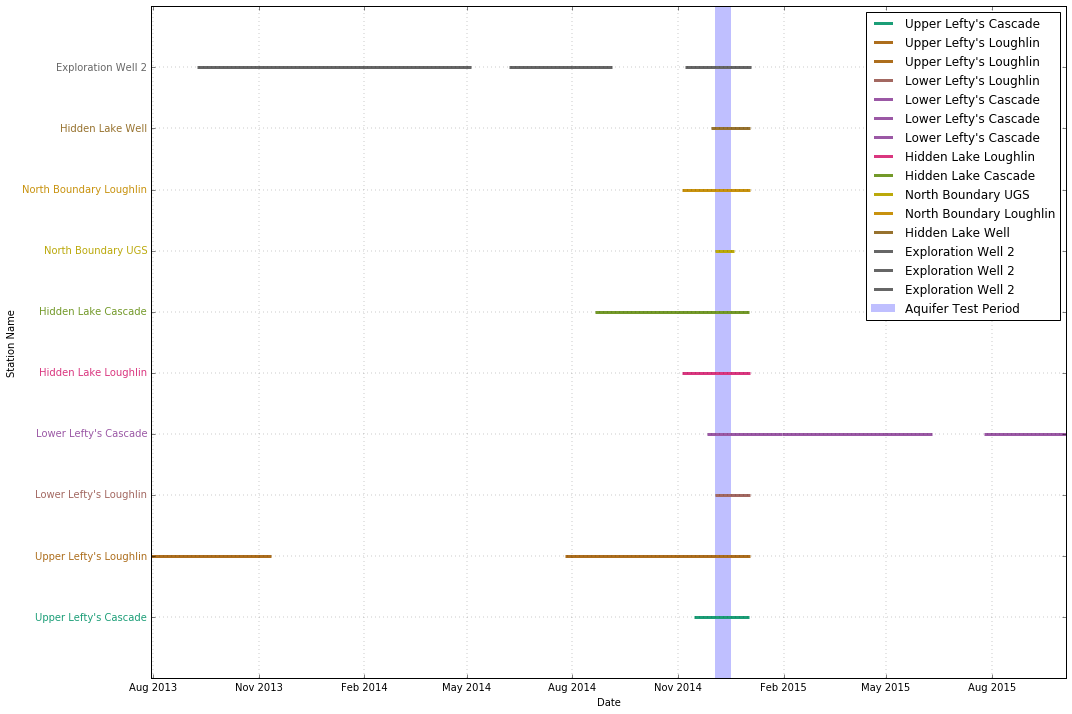

In [11]:
info, fig = wa.gantt(df, stations, labels)
plt.fill_between([pd.datetime(2014,12,2,19),pd.datetime(2014,12,16,19)],[11,11],alpha=0.25,linewidth=0,zorder=0,label='Aquifer Test Period')
plt.rc('svg', fonttype = 'svgfont')
plt.legend()
fig.savefig(rootlocal+"gantt.svg")

In [12]:
fig.savefig(rootlocal+"gantt.pdf")

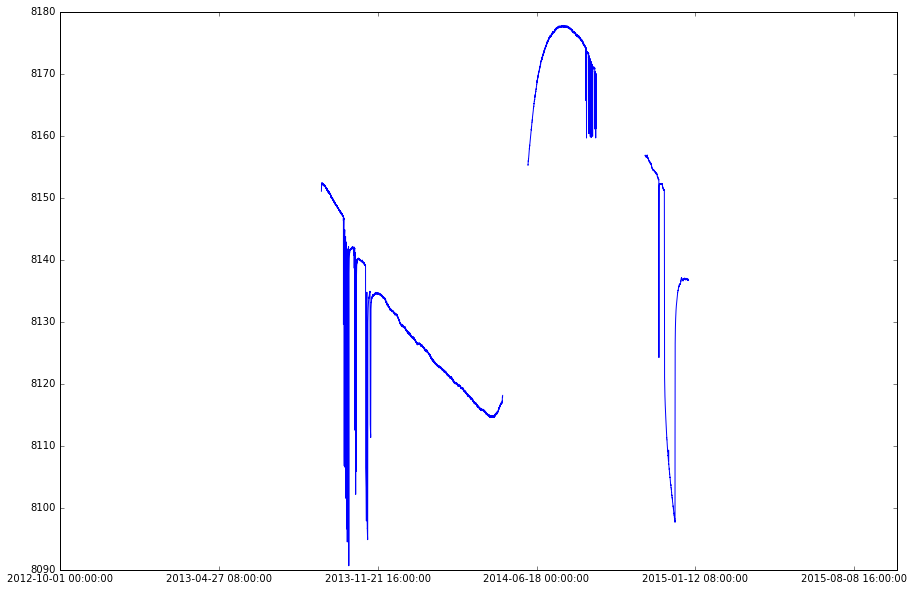

In [13]:
df['EXW_wl_elev_ft'].plot()

In [14]:
info.to_clipboard()

In [15]:
allRecords['UL_LW_Q_gpm'].plot()

NameError: name 'allRecords' is not defined

# Chem

In [16]:
chemFile = "U:/GWP/Groundwater/PowderMt/Water_Chemistry_Results/Powmowchemgraphs.xlsx"
majChem = pd.read_excel(chemFile,"Chem")
chem = pd.read_excel(chemFile,"Cond")

In [17]:
majChem.columns

Index([u'Station ID', u'Name', u'Drainage', u'Type', u'Source', u'East',
       u'North', u'Date', u'Time', u'T', u'pH', u'Cond', u'Cluster Group',
       u'18O', u'2H', u'error18O', u'error2H', u'Mg', u'Ca', u'Na', u'K',
       u'HCO3', u'CO2', u'SiO2', u'TDS', u'CO3 solid', u'Tot Alk',
       u'Charge Balance'],
      dtype='object')

In [18]:
majChem["Cluster Group"]

0      A
1      A
2      A
3      A
4      A
5     B1
6     B1
7     B1
8     B1
9     B1
10    B1
11    B1
12    B1
13    B2
14    B2
15    B2
16    B2
17    B2
18    B2
19    B2
20    B2
21    B2
22    B2
23    B2
24    B2
25    B2
Name: Cluster Group, dtype: object

In [19]:
x = majChem["18O"]
y = majChem["2H"]
xc = majChem["Cluster Group"]
xm = majChem["Type"]
lab = majChem["Station ID"]

$\delta\mathrm D = 8.0\cdot\delta^{18}\mathrm O + 10{}^{0\!}\!/\!_{00}$

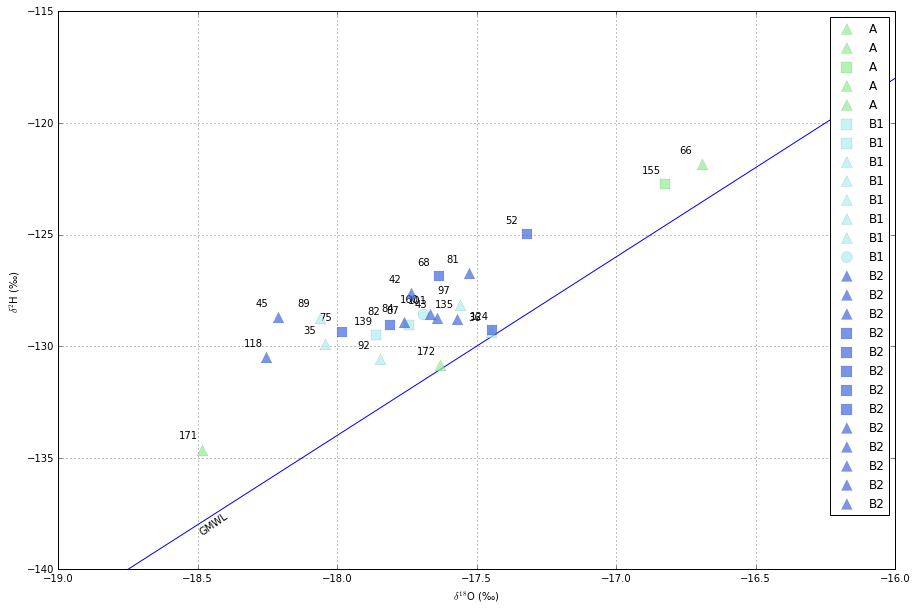

In [20]:
# Isotope Plot
# http://matplotlib.org/1.4.0/users/mathtext.html
# http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

fig = plt.figure()
ax = fig.add_subplot(111)

c = {"B1":"paleturquoise","B2":"royalblue","A":"lightgreen"}
mark = {"Spring":"^","Stream":"s","Well":"o"}
x2 = [-19,-16]
y2 = [8*i+10 for i in x2]
plt.plot(x2,y2, zorder=0)

colars = [c[xc[i]] for i in range(len(x))]
markars = [mark[xm[i]] for i in range(len(x))]

for i in range(len(x)):
    plt.scatter(x[i],y[i],s=[120],color=c[xc[i]],marker=mark[xm[i]],linewidths=0.1,edgecolors='black', zorder=i+1, alpha=0.7, label=xc[i])
    plt.text(x[i]-0.08,y[i]+0.5,lab[i])
plt.text(-18.5,-137.7,"GMWL", rotation=35)
#plt.scatter(x,y,s=[80],color=colars,marker=markars,linewidths=0.1,edgecolors='black', zorder=1)    
plt.xlim(-19,-16)
plt.ylim(-140,-115)
plt.xlabel(r"$\delta^{18}$O"+u" (\u2030)")
plt.ylabel(r"$\delta^{2}$H"+u" (\u2030)")
plt.grid()
plt.legend(scatterpoints=1)
plt.savefig("U:/GWP/Groundwater/PowderMt/Water_Chemistry_Results/" + "isotopes.svg")


In [114]:
import seaborn as sns
sns.set(context='notebook', style="ticks", color_codes=True)

c:\python27\arcgis10.3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [112]:
gname = "Group"

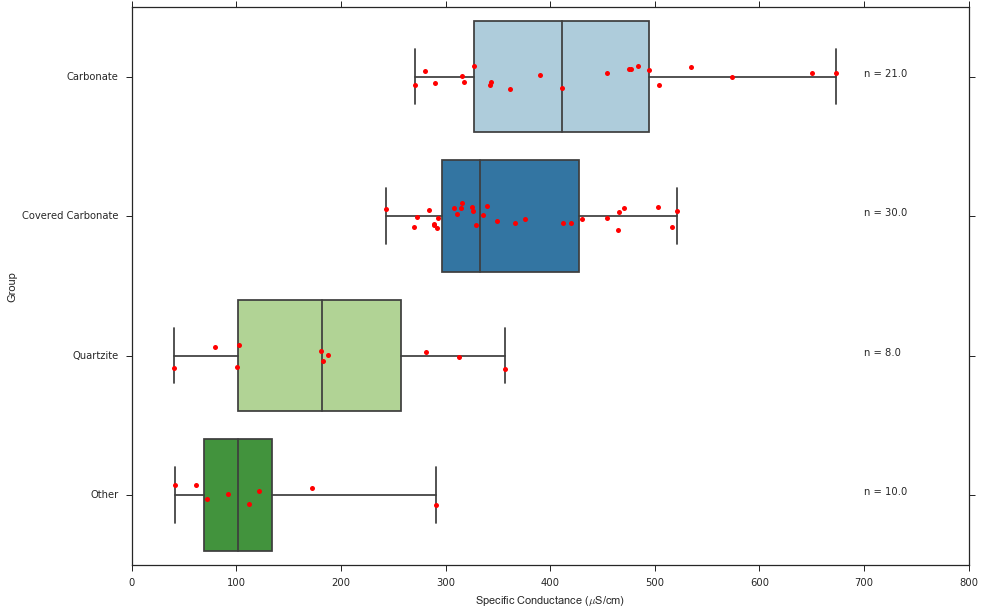

In [121]:
cnt = chem.groupby(gname)["Cond"].agg({'cnt':(lambda x: np.count_nonzero(~np.isnan(x)))})['cnt'].values[::-1]
labs = chem.groupby(gname)["Cond"].count().values[::-1]
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="Cond", y=gname, data=chem,  whis=np.inf, palette="Paired")
sns.stripplot(x="Cond", y=gname, data=chem, jitter=True, size=5, color='red', linewidth=0)
for i in range(len(chem.groupby(gname))):
    plt.text(700, i, "n = " + str(cnt[-1-i]))
plt.xlabel("Specific Conductance ($\mu$S/cm)")
plt.ylabel("Group")
plt.savefig('E:/PROJECTS/POWMOW/CondBoxPlots.svg')